# Data Analyst at the Census Bureau! 📊

# Inspect the Data

The CSVs likely have names like states1.csv, states2.csv, etc., and each file might represent data for a specific batch of states. Open a couple and look for:

Columns like State, Income, GenderPop, TotalPop, race percentages (Hispanic, White, Black, etc.)

# Load and Concatenate CSV Files

In [1]:
import pandas as pd
import glob

In [2]:
# Get all CSV files in the directory
files = glob.glob("states*.csv")

In [3]:
# Load each file into a DataFrame and store in a list
dfs = [pd.read_csv(file) for file in files]

In [4]:
# Convatenate all DataFrames
us_census = pd.concat(dfs, ignore_index=True)

# Check Columns and Data Types

In [5]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

# Remove 'Unnamed: 0' Column

In [6]:
us_census = us_census.drop(columns=['Unnamed: 0'])

In [7]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [8]:
us_census.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

# Inspect Data with .head() and Plan Conversion

In [9]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


# Clean Income Column with Regex

In [10]:
us_census['Income'] = us_census['Income'].replace('[\$,]', '', regex=True).astype(float)

# Split GenderPop into Men and Women

In [11]:
gender_split = us_census['GenderPop'].str.split('_', expand=True)

In [12]:
us_census['Men'] = gender_split[0]

In [13]:
us_census['Women'] = gender_split[1]

# Clean and Convert Men and Women to Numerical

In [14]:
# Clean Men: Remove 'M' and convert to numeric
us_census['Men'] = us_census['Men'].str.replace('M', '', regex=False)
us_census['Men'] = pd.to_numeric(us_census['Men'], errors='coerce')

In [15]:
# Clean Women: Remove 'F' and convert to numeric
us_census['Women'] = us_census['Women'].str.replace('F', '', regex=False)
us_census['Women'] = pd.to_numeric(us_census['Women'], errors='coerce')

In [16]:
# Fill NaNs in Women using TotalPop - Men
us_census['Women'] = us_census['Women'].fillna(us_census['TotalPop'] - us_census['Men'])

In [17]:
# Convert to integer type (Int64 handles NaNs if any remain)
us_census['Men'] = us_census['Men'].astype('Int64')
us_census['Women'] = us_census['Women'].astype('Int64')

In [18]:
us_census[['GenderPop', 'Men', 'Women']].head()

,GenderPop,Men,Women
0,2341093M_2489527F,2341093,2489527
1,384160M_349215F,384160,349215
2,3299088M_3342840F,3299088,3342840
3,1451913M_1506295F,1451913,1506295
4,19087135M_19334329F,19087135,19334329


In [19]:
us_census[['Men', 'Women']].isna().sum()

Men      0
Women    0
dtype: int64

In [20]:
us_census.duplicated().sum()

np.int64(9)

In [21]:
us_census = us_census.drop_duplicates()

In [22]:
us_census.duplicated().sum()

np.int64(0)

# Scatterplot
Make the scatterplot of average income vs. proportion of women.

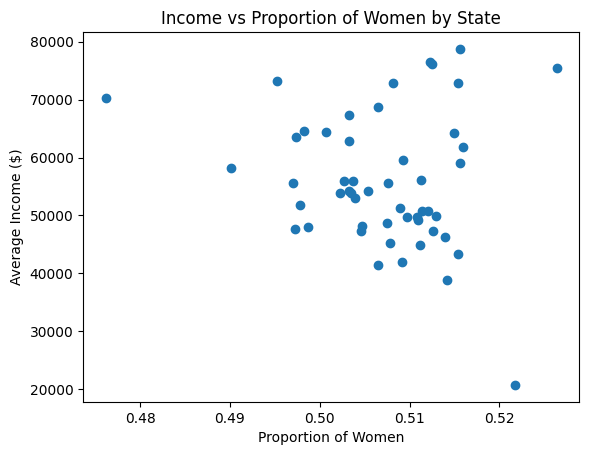

In [23]:
import matplotlib.pyplot as plt

# Calculate proportion of women
us_census['WomenProportion'] = us_census['Women'] / us_census['TotalPop']

# Create scatterplot
plt.scatter(us_census['WomenProportion'], us_census['Income'])
plt.xlabel('Proportion of Women')
plt.ylabel('Average Income ($)')
plt.title('Income vs Proportion of Women by State')
plt.show()

# Clean Race Columns and Create Histograms

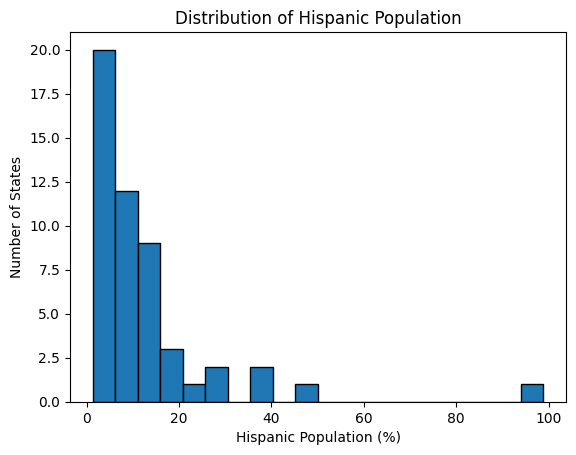

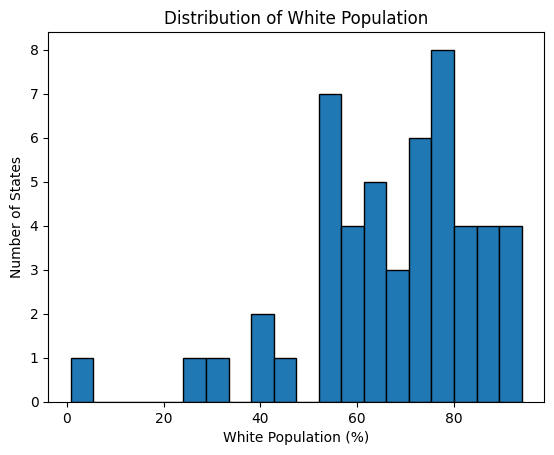

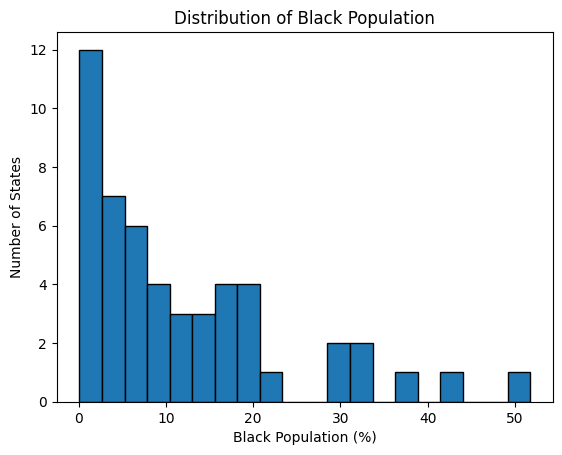

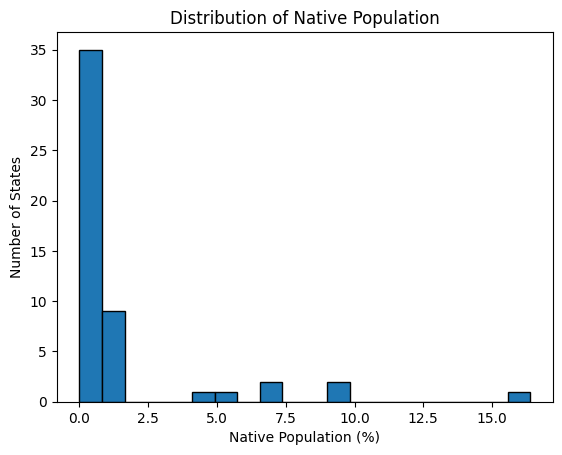

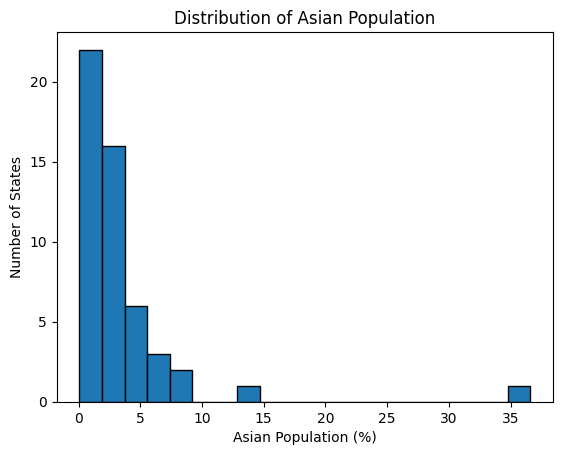

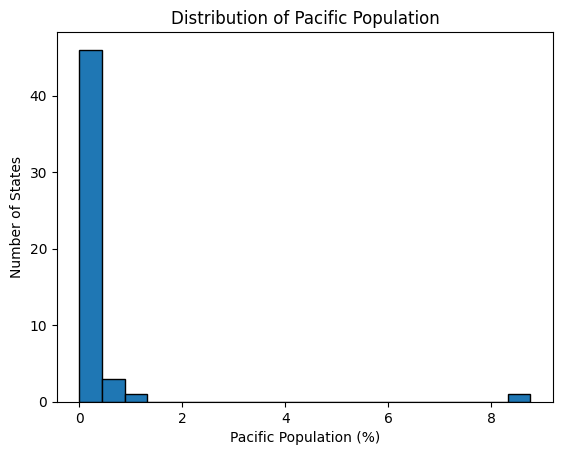

In [24]:
# List of race columns
race_columns = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

# CLean race columns: Remove '%' and convert to float
for col in race_columns:
    us_census[col] = us_census[col].str.replace('%', '', regex=False).astype(float)

# Fill NaNs with 0 (assuming missing race data means 0%)
us_census[race_columns] = us_census[race_columns].fillna(0)

# Create histograms
for col in race_columns:
    plt.figure()
    plt.hist(us_census[col], bins=20, edgecolor='black')
    plt.xlabel(f'{col} Population (%)')
    plt.ylabel('Number of States')
    plt.title(f'Distribution of {col} Population')
    plt.show()

# Creative Visualization

To impress your boss, add a creative visualization, like a correlation heatmap of demographic variables.

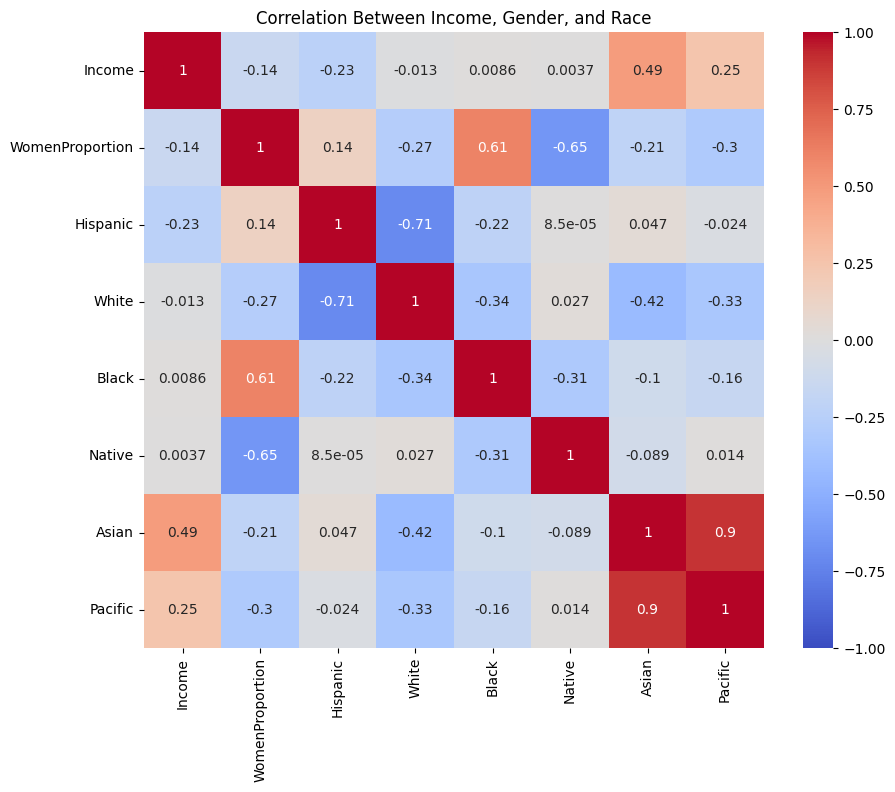

In [25]:
import seaborn as sns

# Select numerical columns for correlation
numerical_cols = ['Income', 'WomenProportion'] + race_columns
corr = us_census[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Income, Gender, and Race')
plt.show()